In [2]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data_set = pd.read_csv('Mall_customers1.csv')
data_set

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [13]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
data_set.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [15]:
data_set.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [22]:
data_set.drop_duplicates(inplace=True)
X = data_set.iloc[:, [3, 4]].values

In [58]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, n_init = 10 )
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

In [59]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42 , n_init = 10 )
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

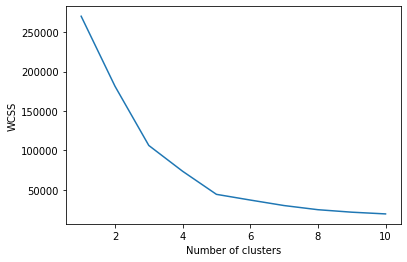

In [65]:
plt.plot(range(1, 11), wcss) 
plt.xlabel('Number of clusters') 

y_kmeans = kmeans.fit_predict(X)

plt.ylabel('WCSS') 
plt.show()

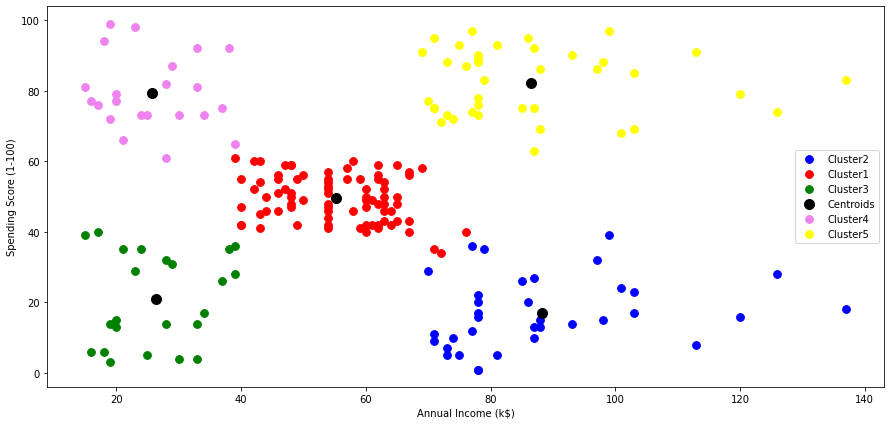

In [66]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42 , n_init = 10 )
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.figure(figsize=(15,7))
plt.scatter( X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter( X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter( X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3') 
plt.scatter( kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.scatter( X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'violet', label = 'Cluster4') 
plt.scatter( X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 60, c = 'yellow', label = 'Cluster5')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.legend() 

plt.show()

Fitting K-means to the dataset and visualising the clusters.
Step 1: Choose the number of K
The identification of K clusters’ number is the first step. The K stands for how many clusters the algorithm would identify in the dataset. Now, making the correct K choice is crucial. Using the Elbow method to find the optimal number of clusters.

The Elbow Method is then used to choose the best K value. In the depiction below we can see that after 3 there’s no significant decrease in WCSS so 3 is the best here. Therefore there’s an elbow shape that forms and it is usually a good idea to pick the number where this elbow is formed. There would be many times when the graph wouldn’t be this intuitive but with practice it becomes easier.

Step 2: Select at random K point the centroid
The second step is to allocate K random points as centroids. These K points could be points from the dataset or outside.

Step 3: Assign eache data point to the closet centroid
the dataset points would be allocated to the centroid which is closest to them.

Step 4: Compute and place the new centroid of each cluster
Calculate the centroid of the individual clusters and place the old centroid there.

Step 5: Reassing each data point to the new closter centroid.
Reassigning points in step three’s manner is the fifth step. Reassignment is necessary, thus we must return to step four. We may declare that our model has converged and is read if no reassignment occurs.

---

